## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

switcher 66.23 %
conservative 33.77 %
newcome 50.86000000000001 %


Text(0.5, 1.0, '3 doors Monty Hall Problem: $N_{iteration}=10000$')

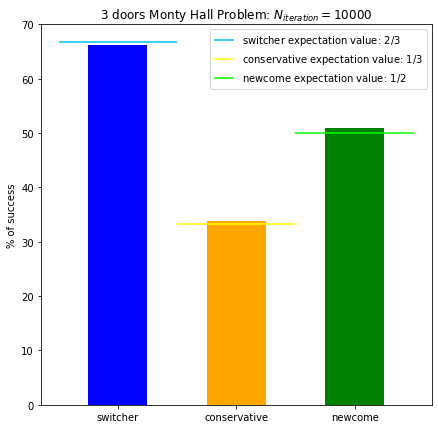

In [58]:
N_doors = 3
N_iter = 10000

switch = np.zeros(N_iter)
cons = np.zeros(N_iter)
newcome = np.zeros(N_iter)

for i in range(N_iter):
    doors_idx = np.arange(0,N_doors)
    
    # extract the index for the door with the car behind:
    car_idx = np.random.choice(np.arange(0,N_doors))
    
    # initial choice:
    init_door = np.random.choice(np.arange(0,N_doors))
    
    # opening of the third door:
    if(init_door!=car_idx):
        opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0][0]

    if(init_door==car_idx):
        opened_door_idx = np.random.choice(np.where((doors_idx!=car_idx))[0])
        
    doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
    # final door's choice
    switch_idx = doors_left_idx[doors_left_idx!=init_door]
    cons_idx = init_door
    newcome_idx = np.random.choice(doors_left_idx)
    
    # increment if the door is the one with the car behind
    if(switch_idx==car_idx):
        switch[i] = 1
        
    if(cons_idx==car_idx):
        cons[i] = 1
        
    if(newcome_idx==car_idx):
        newcome[i] = 1
      
    
# compute the total number of correct choice
switch_result = np.sum(switch)
cons_result = np.sum(cons)
newcome_result = np.sum(newcome)

# plot
fig = plt.figure(figsize=(7,7))

results = [switch_result,cons_result,newcome_result]
x_pos = ['switcher', 'conservative', 'newcome']
colors = ['blue', 'orange', 'green']
#label = ['switcher', 'conservative', 'newcome']

for i in range(len(results)):
    plt.bar(x_pos[i],results[i]/N_iter*100,width=0.5,color=colors[i])
    print(x_pos[i], results[i]/N_iter*100,'%')
    
plt.hlines(2/3*100,-0.5,0.5,color='deepskyblue',label='switcher expectation value: $2/3$')
plt.hlines(1/3*100,0.5,1.5,label='conservative expectation value: $1/3$',color='yellow')
plt.hlines(1/2*100,1.5,2.5,label='newcome expectation value: $1/2$',color='lime')
    
plt.ylabel(r'% of success')
plt.legend()
plt.title(r'%i doors Monty Hall Problem: $N_{iteration}=%.i$'%(N_doors,N_iter))

The results found are consistent with the theoretical expectations since after the third door is opened, the probability of having a car in the initially chosen door and the other door are:

$$ P(init=car) = 1/3 $$

$$ P(change==car) = 2/3 $$

Since the probability of having a car in the second or in the third door must be conserved.

Instead, for the guy coming in after the third door has been opened, the probability of having a car in one of the two doors is simply $1/2$.

- What would happen if you had 100 doors to choose from and the presenter opens 98 or them?

The above line of reasoning can be expanded to $N$ doors: if the host opens all the $N-2$ doors with the goats behind:

- The probability of having the car in the initially chosen door is unchanged from the beginning:

$$ P(init=car) = \frac{1}{N} $$

- Instead, the probability of having the car behind the other remaining door will be:

$$ P(change=car) = \frac{N-1}{N} $$

Let's check this numerically, by adapting the above code to the $N$ doors scenario.

Percentage of success:
switcher 99.13 %
conservative 0.8699999999999999 %
newcome 51.190000000000005 %


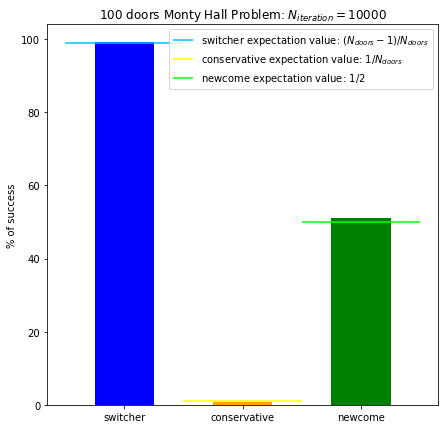

In [314]:
N_doors = 100
N_iter = 10000

switch = np.zeros(N_iter)
cons = np.zeros(N_iter)
newcome = np.zeros(N_iter)

for i in range(N_iter):
    doors_idx = np.arange(0,N_doors)
    
    # extract the index for the door with the car behind:
    car_idx = np.random.choice(np.arange(0,N_doors))
    
    # initial choice:
    init_door = np.random.choice(np.arange(0,N_doors))
    
    # opening of the other N-2 doors:
    if(init_door!=car_idx): 
        opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0]

    if(init_door==car_idx):
        possible_open_idx = np.where((doors_idx!=car_idx))[0]
        not_opened = np.random.choice(possible_open_idx[:-1])
        opened_door_idx = np.delete(possible_open_idx,not_opened)
        
    doors_left_idx = np.delete(doors_idx, opened_door_idx)

    # final door's choice
    switch_idx = doors_left_idx[doors_left_idx!=init_door]
    cons_idx = init_door
    newcome_idx = np.random.choice(doors_left_idx)
    
    # increment if the door is the one with the car behind
    if(switch_idx==car_idx):
        switch[i] = 1
        
    if(cons_idx==car_idx):
        cons[i] = 1
        
    if(newcome_idx==car_idx):
        newcome[i] = 1
      
    
# compute the total number of correct choice
switch_result = np.sum(switch)
cons_result = np.sum(cons)
newcome_result = np.sum(newcome)

# plot
results = [switch_result,cons_result,newcome_result]
x_pos = ['switcher', 'conservative', 'newcome']
colors = ['blue', 'orange', 'green']
#label = ['switcher', 'conservative', 'newcome']

# plot
fig = plt.figure(figsize=(7,7))

print('Percentage of success:')
for i in range(len(results)):
    plt.bar(x_pos[i],results[i]/N_iter*100,width=0.5,color=colors[i])
    print(x_pos[i], results[i]/N_iter*100,'%')
    
plt.hlines(((N_doors-1)/N_doors)*100,-0.5,0.5,color='deepskyblue',label='switcher expectation value: ${(N_{doors}-1)}/{N_{doors}}$')
plt.hlines((1/N_doors)*100,0.5,1.5,label='conservative expectation value: ${1}/N_{doors}$',color='yellow')
plt.hlines(1/2*100,1.5,2.5,label='newcome expectation value: $1/2$',color='lime')
    
plt.ylabel(r'% of success')
plt.legend()
plt.title(r'%i doors Monty Hall Problem: $N_{iteration}=%i$'%(N_doors,N_iter));

- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In this case:

- the probability of the conservative is:

$$ p(cons) = \frac{1}{N}$$

- the probability of the newcome is:

$$ p(newcome) = \frac{1}{N-M} $$

- the probability of the switcher is:

$$ p(switcher) = \frac{N-1}{N(N-1-M)}$$

In [196]:
N_doors = [5,10,50,100,250,500,1000]
N_iter = 1000

switch_result = np.zeros(len(N_doors),dtype=object)
cons_result = np.zeros(len(N_doors),dtype=object)
newcome_result = np.zeros(len(N_doors),dtype=object)

# iterate over different possible number of doors
for j in tqdm(range(len(N_doors))):
    
    switch_m = np.zeros(N_doors[j]-2)
    cons_m = np.zeros(N_doors[j]-2)
    newcome_m = np.zeros(N_doors[j]-2)
    
    for m in range(1,N_doors[j]-1): # m is the number of doors opened by the host
        
        switch = np.zeros(N_iter)
        cons = np.zeros(N_iter)
        newcome = np.zeros(N_iter)
        
        for i in range(N_iter):
            doors_idx = np.arange(0,N_doors[j])
    
            # extract the index for the door with the car behind:
            car_idx = np.random.choice(np.arange(0,N_doors[j]))
    
            # initial choice:
            init_door = np.random.choice(np.arange(0,N_doors[j]))
    
            # opening of the other m doors:
            if(init_door!=car_idx): 
                possible_open_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0]
                opened_door_idx = np.random.choice(possible_open_idx,size=m,replace=False)
                
            if(init_door==car_idx):
                possible_open_idx = np.where((doors_idx!=car_idx))[0]
                opened_door_idx = np.random.choice(possible_open_idx,size=m,replace=False)
        
            doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
            # final door's choice
            switch_idx = np.random.choice(doors_left_idx[doors_left_idx!=init_door])
            cons_idx = init_door
            newcome_idx = np.random.choice(doors_left_idx)
    
            # increment if the door is the one with the car behind
            if(switch_idx==car_idx):
                switch[i] = 1
        
            if(cons_idx==car_idx):
                cons[i] = 1
        
            if(newcome_idx==car_idx):
                newcome[i] = 1
      
    
        # compute the total number of correct choice at fixed m
        switch_m[m-1] = np.sum(switch)/N_iter*100
        cons_m[m-1] = np.sum(cons)/N_iter*100
        newcome_m[m-1] = np.sum(newcome)/N_iter*100
        
    switch_result[j] = switch_m
    cons_result[j] = cons_m
    newcome_result[j] = newcome_m


100%|██████████| 7/7 [11:05<00:00, 95.04s/it] 


"\n\n# plot\n\nplt.plot(N_doors,switch_result/N_iter*100)\nplt.scatter(N_doors,switch_result/N_iter*100,label='switcher')\n\nplt.plot(N_doors,cons_result/N_iter*100)\nplt.scatter(N_doors,cons_result/N_iter*100,label='conservative')\n\nplt.plot(N_doors,newcome_result/N_iter*100)\nplt.scatter(N_doors,newcome_result/N_iter*100,label='newcome')\n\nplt.xscale('log')\nplt.xlabel(r'$N_{doors}$')\nplt.ylabel(r'% of success')\nplt.title(r'$N$ doors Monty Hall problem')\n\nplt.legend()\n"

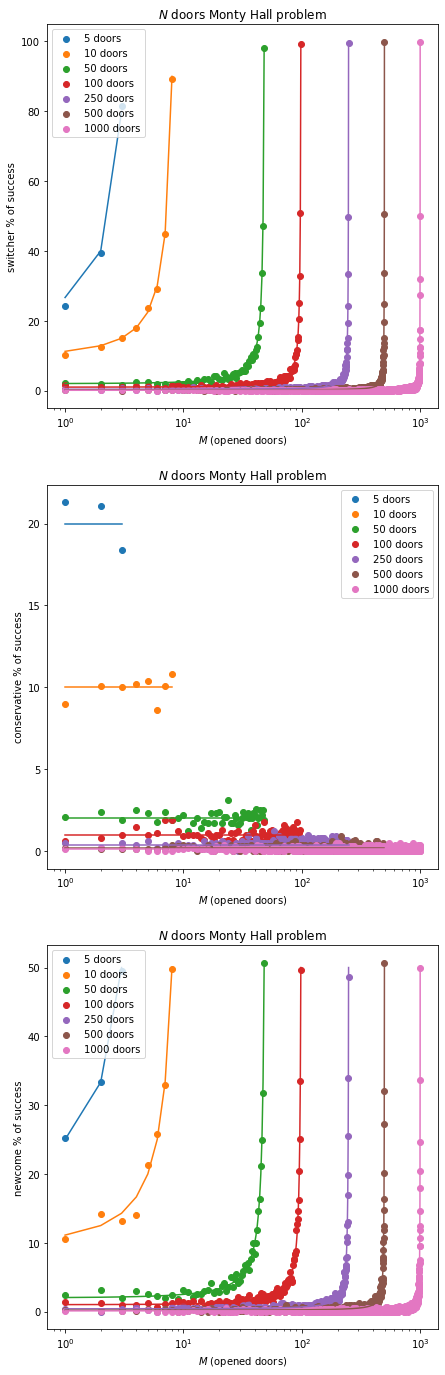

In [289]:
# plot at constant N_doors:

fig,ax = plt.subplots(figsize=(7,24),ncols=1,nrows=3)

for i in range(len(switch_result)):
    m = np.arange(1,N_doors[i]-1)
    #ax[0].plot(m, switch_result[i],c='C%i'%i)
    ax[0].scatter(m, switch_result[i],label='%i doors'%N_doors[i],c='C%i'%i)
    ax[0].plot(m,(N_doors[i]-1)/(N_doors[i]*(N_doors[i]-1-m))*100)
    
    #ax[1].plot(m, cons_result[i])
    ax[1].scatter(m, cons_result[i],label='%i doors'%N_doors[i])
    ax[1].plot(m,len(m)*[(1/N_doors[i])*100])
    
    #ax[2].plot(m, newcome_result[i])
    ax[2].scatter(m, newcome_result[i],label='%i doors'%N_doors[i])
    ax[2].plot(m,1/(N_doors[i]-m)*100)
    
# plot 
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$M$ (opened doors)')
ax[0].set_ylabel(r'switcher % of success')
ax[0].set_title(r'$N$ doors Monty Hall problem')
#ax[0].set_xlim(0.5,1.5*10**3)
ax[0].legend()

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$M$ (opened doors)')
ax[1].set_ylabel(r'conservative % of success')
ax[1].set_title(r'$N$ doors Monty Hall problem')
#ax[1].set_xlim(0.5,1.5*10**3)
#ax[1].set_yscale('log')
ax[1].legend()

ax[2].set_xscale('log')
ax[2].set_xlabel(r'$M$ (opened doors)')
ax[2].set_ylabel(r'newcome % of success')
ax[2].set_title(r'$N$ doors Monty Hall problem')
#ax[2].set_xlim(0.5,1.5*10**3)
ax[2].legend()

In [ ]:
plt.plot(N_doors,switch_result)

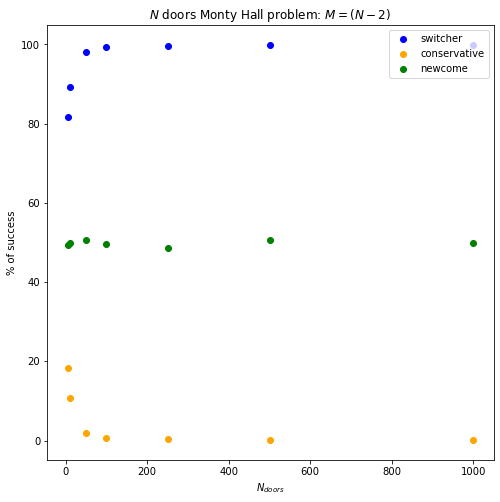

In [311]:
# plot the result at fixed M=N-2
fig = plt.figure(figsize=(8,8))

for i in range(len(N_doors)):
    plt.scatter(N_doors[i],switch_result[i][-1],color='blue')
    plt.scatter(N_doors[i],cons_result[i][-1],color='orange')
    plt.scatter(N_doors[i],newcome_result[i][-1],color='green')
    
plt.xlabel(r'$N_{doors}$')
plt.ylabel(r'% of success')
plt.title(r'$N$ doors Monty Hall problem: $M=(N-2)$')

plt.legend(['switcher','conservative','newcome'])

# Stuff

In [32]:
def Monty_Hall_3doors(N_iter):
    N_doors = 3
    N_iter = 100

    switch = np.zeros(N_iter)
    cons = np.zeros(N_iter)
    newcome = np.zeros(N_iter)

    for i in range(N_iter):
        doors_idx = np.arange(0,N_doors)
    
        # extract the index for the door with the car behind:
        car_idx = np.random.choice(np.arange(0,N_doors))
    
        # initial choice:
        init_door = np.random.choice(np.arange(0,N_doors))
    
        # opening of the third door:
        if(init_door!=car_idx):
            opened_door_idx = np.where((doors_idx!=car_idx)&(doors_idx!=init_door))[0][0]

        if(init_door==car_idx):
            opened_door_idx = np.random.choice(np.where((doors_idx!=car_idx))[0])
        
        doors_left_idx = np.delete(doors_idx, opened_door_idx)
        
        # final door's choice
        switch_idx = doors_left_idx[doors_left_idx!=init_door]
        cons_idx = init_door
        newcome_idx = np.random.choice(doors_left_idx)
    
        # increment if the door is the one with the car behind
        if(switch_idx==car_idx):
            switch[i] = 1
        
        if(cons_idx==car_idx):
            cons[i] = 1
        
        if(newcome_idx==car_idx):
            newcome[i] = 1
      
    
    # compute the total number of correct choice
    switch_result = np.sum(switch)
    cons_result = np.sum(cons)
    newcome_result = np.sum(newcome)
    
    return switch_result/N_iter, cons_result/N_iter, newcome_result/N_iter

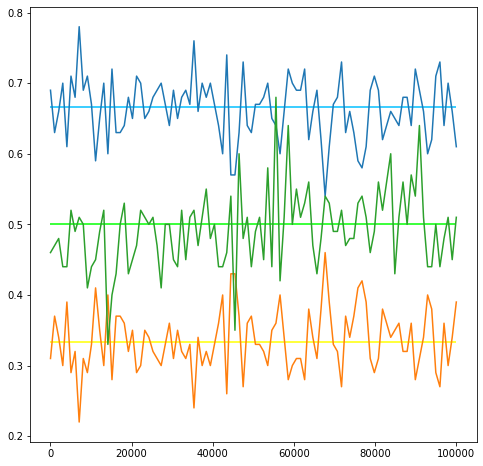

In [45]:
N_iter_arr = np.linspace(10,100000,num=100,dtype=int)

switch_perc_res = np.zeros(N_iter_arr.shape)
cons_perc_res = np.zeros(N_iter_arr.shape)
newcome_perc_res = np.zeros(N_iter_arr.shape)

for i in range(len(N_iter_arr)):
    switch_perc_res[i],cons_perc_res[i],newcome_perc_res[i] = Monty_Hall_3doors(N_iter_arr[i])

fig = plt.figure(figsize=(8,8))

plt.plot(N_iter_arr,switch_perc_res)
plt.plot(N_iter_arr,cons_perc_res)
plt.plot(N_iter_arr,newcome_perc_res)

plt.hlines(2/3,min(N_iter_arr),max(N_iter_arr),color='deepskyblue',label='switcher expectation value')
plt.hlines(1/3,min(N_iter_arr),max(N_iter_arr),label='conservative expectation value',color='yellow')
plt.hlines(1/2,min(N_iter_arr),max(N_iter_arr),label='newcome expectation value',color='lime')